In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [2]:
df = pd.read_csv("../../data/processed/encoded_dataset-non-impute.csv",index_col=0)

In [3]:
df.head()

,GVWR Class,Model Year,Electric Mile Range,Number of Vehicles Registered at the Same Address,Vehicle Population,Vehicle Category_BS,Vehicle Category_BT,Vehicle Category_MC,Vehicle Category_MH,Vehicle Category_P,...,Vehicle Category_T6,Vehicle Category_T7,Fuel Type_Electric,Fuel Type_Gasoline,Fuel Type_Hydrogen,Fuel Type_Natural Gas,Fuel Type_Unknown,Fuel Technology_FCEV,Fuel Technology_ICE,Fuel Technology_PHEV
Date,,,,,,,,,,,,,,,,,,,,,
2019,0,2020,0,4,395883,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2020,0,2020,0,1,370954,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2021,0,2020,0,1,349406,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2019,0,2019,0,4,348475,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2019,0,2018,0,4,333296,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,GVWR Class,Model Year,Electric Mile Range,Number of Vehicles Registered at the Same Address,Vehicle Population,Vehicle Category_BS,Vehicle Category_BT,Vehicle Category_MC,Vehicle Category_MH,Vehicle Category_P,Vehicle Category_T1,Vehicle Category_T2,Vehicle Category_T3,Vehicle Category_T4,Vehicle Category_T5,Vehicle Category_T6,Vehicle Category_T7,Fuel Type_Electric,Fuel Type_Gasoline,Fuel Type_Hydrogen,Fuel Type_Natural Gas,Fuel Type_Unknown,Fuel Technology_FCEV,Fuel Technology_ICE,Fuel Technology_PHEV
GVWR Class,1.000000,0.004859,0.018614,-0.007875,-0.063154,-0.135075,-0.126649,-0.130196,-0.127735,-0.182132,-0.168850,-0.171475,-0.113824,-0.114990,0.114885,0.551269,0.518705,-0.164571,-0.018391,-0.026920,0.036989,-0.026413,-0.026920,0.177212,-0.050490
Model Year,0.004859,1.000000,0.115320,0.000915,0.132031,0.007778,0.028370,0.024447,-0.024187,0.075273,-0.064176,-0.000121,-0.006658,-0.018376,0.005305,-0.008054,-0.010409,0.126308,-0.122804,0.072468,0.174213,0.041083,0.072468,-0.186331,0.148556
Electric Mile Range,0.018614,0.115320,1.000000,-0.031052,0.012203,-0.004521,-0.024790,-0.095325,0.002766,0.160322,-0.012700,0.026187,-0.020507,-0.018691,-0.006483,-0.009145,-0.007206,-0.193007,0.056551,0.295347,0.005068,0.000765,0.295347,0.051037,0.187948
Number of Vehicles Registered at the Same Address,-0.007875,0.000915,-0.031052,1.000000,0.015521,-0.006667,0.001285,0.012472,-0.010785,-0.011033,0.006393,-0.002930,-0.000675,0.001970,-0.000981,0.000936,0.010590,0.050389,-0.033064,0.003313,0.039237,0.006414,0.003313,-0.046425,-0.002796
Vehicle Population,-0.063154,0.132031,0.012203,0.015521,1.000000,-0.042853,-0.040210,-0.020185,-0.036505,0.269781,-0.011466,0.070220,0.029472,-0.040342,-0.033042,-0.091743,-0.033227,-0.050175,0.187225,-0.009907,-0.055899,-0.008511,-0.009907,0.052859,-0.011359
Vehicle Category_BS,-0.135075,0.007778,-0.004521,-0.006667,-0.042853,1.000000,-0.052246,-0.053710,-0.052695,-0.075135,-0.066268,-0.072173,-0.078501,-0.076912,-0.050167,-0.123123,-0.051119,-0.053956,-0.022730,-0.013090,0.066198,-0.010896,-0.013090,0.062357,-0.025594
Vehicle Category_BT,-0.126649,0.028370,-0.024790,0.001285,-0.040210,-0.052246,1.000000,-0.050359,-0.049408,-0.070448,-0.062135,-0.067671,-0.073605,-0.072114,-0.047038,-0.115443,-0.047931,-0.012788,-0.042394,-0.012273,0.077709,-0.005129,-0.012273,0.023617,-0.023998
Vehicle Category_MC,-0.130196,0.024447,-0.095325,0.012472,-0.020185,-0.053710,-0.050359,1.000000,-0.050791,-0.072421,-0.063875,-0.069566,-0.075666,-0.074133,-0.048355,-0.118676,-0.049273,0.114480,0.011334,-0.012617,-0.020129,0.101145,-0.012617,-0.094162,-0.024670
Vehicle Category_MH,-0.127735,-0.024187,0.002766,-0.010785,-0.036505,-0.052695,-0.049408,-0.050791,1.000000,-0.071052,-0.062668,-0.068251,-0.074236,-0.072732,-0.047441,-0.116433,-0.048342,-0.063977,0.017103,-0.012379,-0.054958,0.088139,-0.012379,0.070911,-0.024204
Vehicle Category_P,-0.182132,0.075273,0.160322,-0.011033,0.269781,-0.075135,-0.070448,-0.072421,-0.071052,1.000000,-0.089355,-0.097316,-0.105849,-0.103706,-0.067644,-0.166017,-0.068928,0.239539,-0.078833,0.116967,0.036953,-0.014692,0.116967,-0.304285,0.142691


In [7]:
# Random Forest Feature Importance
rf = RandomForestRegressor(max_depth=50, n_estimators=150, random_state=42)

In [13]:
X = df.drop(['Vehicle Population'],axis=1)

In [14]:
y = df['Vehicle Population']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=150, random_state=42)

In [19]:
# Evaluate
y_pred = rf.predict(X_test)
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

RMSE: 5849.220931790117
R²: 0.901691369672935


In [20]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns

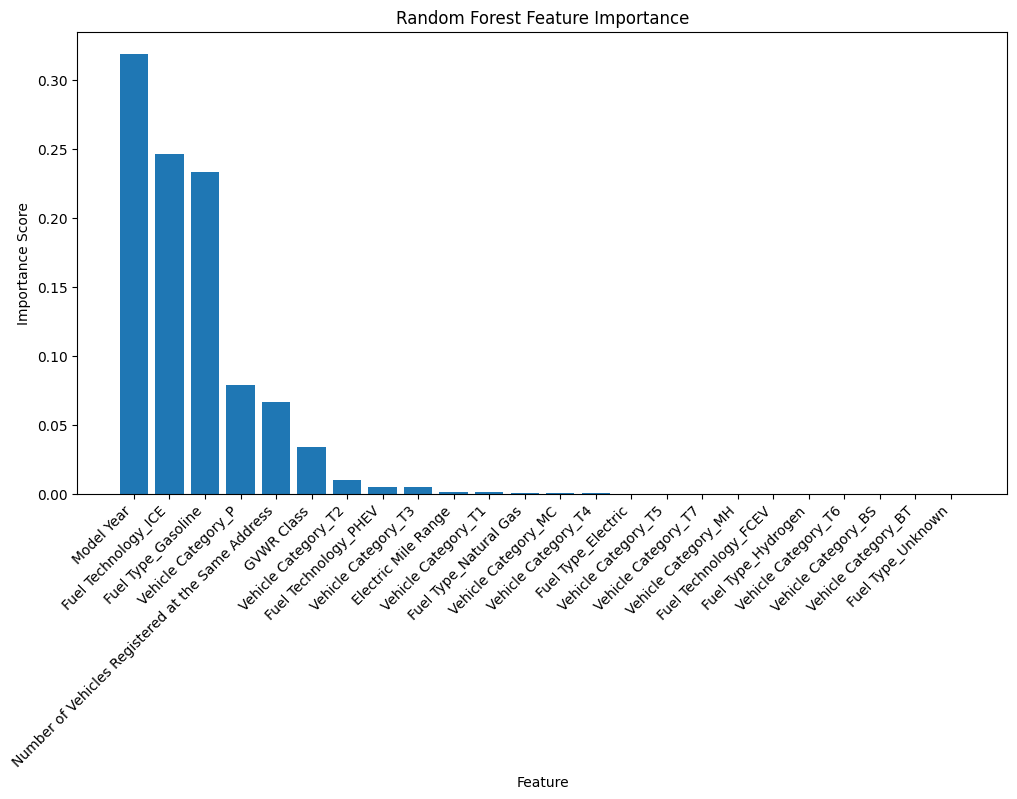

In [21]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
X = df[['Model Year','Fuel Technology_ICE','Fuel Type_Gasoline',' Vehicle Category_P','Number of Vehicles Registered at the Same Adddress]]

In [38]:
X

,Model Year,Fuel Technology_ICE,Fuel Type_Gasoline
Date,,,
2019,2020,True,True
2020,2020,True,True
2021,2020,True,True
2019,2019,True,True
2019,2018,True,True
...,...,...,...
2019,1983,True,False
2019,1980,True,False
2019,1978,True,False


In [39]:
y

Date
2019    395883
2020    370954
2021    349406
2019    348475
2019    333296
         ...  
2019         1
2019         1
2019         1
2019         1
2019         1
Name: Vehicle Population, Length: 40450, dtype: int64

In [40]:
model2 = RandomForestRegressor(max_depth=50, n_estimators=150, random_state=42)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, n_estimators=150, random_state=42)

In [43]:
y_pred = model2.predict(X_test)

In [45]:
root_mean_squared_error(y_test,y_pred)

np.float64(17639.59358306282)